# Supp: clinical scores group comparisons

- Project:        HCP-EP
- File Name:      clinical_group_differences
- Author:         Haley Wang
- Date Created:   2023-9-22
- Last Modified:  2023-9-22
- Code Status:    Testing

In [15]:
import numpy as np
import pandas as pd
import pyls
import h5py
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from netneurotools import datasets, stats, plotting
from scipy import stats
from scipy.stats import zscore, pearsonr, ttest_ind
from scipy.spatial.distance import squareform, pdist

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('all')

### Import clinical data from both EP and MEND

In [99]:
"""
load data (age and sex were regressed out)
"""

EP = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/behavioral/HCPEP_Cli_Behav_data.csv')
MEND = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_MEND_Replication/clinical_all.csv')

### For EP

In [37]:
EP = EP[EP['cohort'] != 3]
EP['dx'] = pd.to_numeric(EP['dx'], errors='coerce')

In [38]:
# Define a function to set the values of column "A" based on column "B"
def set_value(row):
    if row['dx'] in [295.90, 295.40, 298.80, 297.10]:
        return 1
    elif row['dx'] in [295.70]:
        return 2
    elif row['dx'] in [296.24, 296.44, 296.89, 296.54, 296.34, 296.40, 296.53]:
        return 3

# Apply the function to create column "A"
EP['Group'] = EP.apply(set_value, axis=1)

In [39]:
EP['Group']

5      1.0
6      1.0
7      2.0
9      1.0
10     1.0
11     1.0
12     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     3.0
20     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     2.0
37     1.0
38     1.0
39     1.0
40     1.0
41     2.0
42     1.0
43     1.0
45     1.0
46     1.0
47     2.0
48     1.0
49     1.0
50     1.0
51     1.0
53     1.0
54     3.0
56     1.0
57     1.0
58     1.0
59     1.0
60     1.0
61     1.0
62     1.0
63     1.0
64     3.0
65     1.0
71     3.0
74     3.0
75     2.0
77     3.0
80     3.0
81     1.0
82     1.0
83     1.0
85     1.0
88     3.0
89     1.0
90     2.0
91     1.0
92     1.0
93     2.0
94     2.0
95     1.0
96     1.0
97     2.0
99     1.0
100    1.0
101    NaN
102    1.0
104    1.0
105    1.0
106    3.0
107    1.0
108    3.0
110    2.0
114    3.0
115    1.0
116    2.0
119    1.0
120    1.0
121    1.0
122    1.0
123    2.0
124    1.0
125    1.0

In [40]:
# Get column names as a list
column_names = EP.columns.tolist()

# Print or use the list
print(column_names)


['collection_id', 'ndar_subject01_id', 'dataset_id', 'subjectkey', 'src_subject_id', 'interview_date', 'interview_age_month', 'interview_age_year', 'sex', 'race_description', 'race', 'hispanic_description', 'hispanic', 'phenotype_description', 'phenotype', 'handedness', 'mother_edu', 'father_edu', 'parental_edu', 'site', 'cohort', 'dx', 'dx_code', 'dx_group', 'scan_data', 'onset_age', 'med_equiv_current', 'med_life_exp_in_month', 'cannabis_use', 'cog_fluid', 'cog_crystal', 'cog_earlychildhood', 'cog_total', 'gaf_total', 'gaf_symptom', 'gaf_occupational', 'gaf_SocFunc', 'panss_total', 'pos_p1', 'pos_p2', 'pos_p3', 'pos_p4', 'pos_p5', 'pos_p6', 'pos_p7', 'pos_total', 'neg_n1', 'neg_n2', 'neg_n3', 'neg_n4', 'neg_n5', 'neg_n6', 'neg_n7', 'neg_total', 'gps_g1', 'gps_g2', 'gps_g3', 'gps_g4', 'gps_g5', 'gps_g6', 'gps_g7', 'gps_g8', 'gps_g9', 'gps_g10', 'gps_g11', 'gps_g12', 'gps_g13', 'gps_g14', 'gps_g15', 'gps_g16', 'gps_total', 'cains_total', 'cains_1', 'cains_2', 'cains_3', 'cains_4', 'cai

In [10]:
# Calculate the sum of those columns row-wise and store it in a new column 'pos_total'
EP['total_positive'] = EP.filter(like='pos_').sum(axis=1)
EP['total_negtive'] = EP.filter(like='neg_').sum(axis=1)
EP['total_general'] = EP.filter(like='gps_').sum(axis=1)
EP['total_mania'] = EP.filter(like='ymrs_').sum(axis=1)


In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
# Perform ANCOVA
formula = 'pos_total ~ C(Group) + interview_age_month + sex'
model = ols(formula, data=EP).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),276.072594,2.0,10.189658,0.000083
interview_age_month,0.078872,1.0,0.005822,0.939308
sex,19.543108,1.0,1.442646,0.232137
Residual,1584.964584,117.0,NaN,NaN


In [49]:
# Perform ANCOVA
formula = 'neg_total ~ C(Group) + interview_age_month + sex'
model = ols(formula, data=EP).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),326.158821,2.0,6.050176,0.003159
interview_age_month,0.734519,1.0,0.027250,0.869168
sex,6.064922,1.0,0.225006,0.636136
Residual,3153.675174,117.0,NaN,NaN


In [50]:
# Perform ANCOVA
formula = 'gps_total ~ C(Group) + interview_age_month + sex'
model = ols(formula, data=EP).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),227.784564,2.0,4.350522,0.015050
interview_age_month,4.683454,1.0,0.178901,0.673096
sex,5.980030,1.0,0.228429,0.633583
Residual,3062.942297,117.0,NaN,NaN


In [51]:
# Perform ANCOVA
formula = 'ymrs_total ~ C(Group) + interview_age_month + sex'
model = ols(formula, data=EP).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),59.278608,2.0,1.065930,0.347700
interview_age_month,35.729019,1.0,1.284936,0.259281
sex,14.582339,1.0,0.524430,0.470391
Residual,3281.115557,118.0,NaN,NaN


In [52]:
import statsmodels.stats.multitest as smm

# Given p-values from the four ANOVA tests
p_values = [0.000083, 0.003159, 0.015050, 0.347700]

# Apply the Benjamini-Hochberg correction
_, pvals_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='fdr_bh')

# The corrected p-values (q-values) are stored in pvals_corrected
print("q-values:", pvals_corrected)

q-values: [3.32000000e-04 6.31800000e-03 2.00666667e-02 3.47700000e-01]


In [53]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = EP.groupby('Group')['pos_total'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1.0    11.543210  3.765134
2.0    14.000000  4.898979
3.0     8.888889  2.470337


In [54]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = EP.groupby('Group')['neg_total'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1.0    15.296296  5.769412
2.0    12.714286  3.268229
3.0    10.962963  3.715679


In [55]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = EP.groupby('Group')['gps_total'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1.0    25.432099  4.936948
2.0    25.642857  6.246318
3.0    22.000000  4.867474


In [56]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = EP.groupby('Group')['ymrs_total'].agg(['mean', 'std'])

print(grouped_stats)

           mean       std
Group                    
1.0    4.500000  4.518711
2.0    6.785714  8.411792
3.0    4.982143  5.358417


### Violin plots

In [70]:
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap, to_rgb, to_hex
pal_bgo_3 = ["#31A9E7", "#305861", "#F19100"]
cmap_bgo_3 = ListedColormap([to_rgb(_) for _ in pal_bgo_3])

In [72]:
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

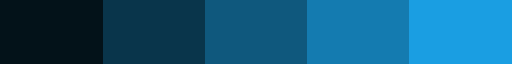

In [73]:
ListedColormap([to_hex(scale_lightness(to_rgb(pal_bgo_3[0]), _)) for _ in [0.1, 0.3, 0.5, 0.7, 0.9]])

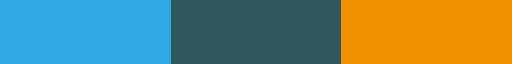

In [74]:
cmap_bgo_3

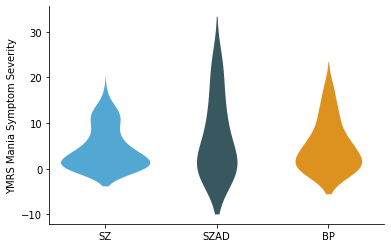

In [92]:
from matplotlib.colors import to_rgb, to_hex
import colorsys
import seaborn as sns
import matplotlib.pyplot as plt

# Original color palette
pal_bgo_3 = ["#31A9E7", "#305861", "#F19100"]

# Function to scale lightness of an RGB color
def scale_lightness(rgb, scale_l):
    h, l, s = colorsys.rgb_to_hls(*rgb)
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

# Create a list of brighter colors
bright_colors = [scale_lightness(to_rgb(color), 1.05) for color in pal_bgo_3]

# Convert to hex for seaborn compatibility
bright_colors_hex = [to_hex(color) for color in bright_colors]

# Create the plot
ax = sns.violinplot(
    data=EP,  # Your data here
    x="Group", y="ymrs_total", 
    palette=bright_colors_hex,
    inner=None,
    scale="area",
    linewidth=0
)

new_labels = ['SZ', 'SZAD', 'BP']  # Define your new labels here
ax.set_xticks(range(len(new_labels)))  # This sets the positions of the ticks
ax.set_xticklabels(new_labels) 
ax.set_xlabel('')
ax.set_ylabel('YMRS Mania Symptom Severity')
# Remove right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


### For MEND

### For EP

In [100]:
# Get column names as a list
column_names = MEND.columns.tolist()

# Print or use the list
print(column_names)


['ID', 'sex', 'AgeAtBaseline', 'PatientType2', 'BPRS_SomaticConcern', 'BPRS_Anxiety', 'BPRS_EmotionalWithdrawal', 'BPRS_ConceptualDisorg', 'BPRS_GuiltFeelings', 'BPRS_Tension', 'BPRS_MannerismsPosturing', 'BPRS_Grandiosity', 'BPRS_DepressiveMood', 'BPRS_Hostility', 'BPRS_Suspiciousness', 'BPRS_HallucinatoryBehav', 'BPRS_MotorRetard', 'BPRS_Uncooperativeness', 'BPRS_UnusualThoughtContent', 'BPRS_BluntedAffect', 'BPRS_Excitement', 'BPRS_Disorientation', 'SANS_UnchangingFacialExpr', 'SANS_DecSpontaneousMvmt', 'SANS_PaucityExprGestures', 'SANS_PoorEyeContact', 'SANS_AffectiveNonResp', 'SANS_LackVocalInflections', 'SANS_GlobalRatAffectiveFlat', 'SANS_PovertySpeech', 'SANS_PovertyContentSpeech', 'SANS_Blocking', 'SANS_IncLatencyResp', 'SANS_GlobalRatAlogia', 'SANS_GroomingHygiene', 'SANS_PhysicalAnergia', 'SANS_GlobalRatAvolition', 'SANS_Asociality', 'SANS_Anhedonia', 'SANS_DecrSexIntAct', 'SANS_AbilityFeelIntimacyCloseness', 'SANS_GlobalRatAsocAnhed', 'YMRS_ElevatedMood', 'YMRS_IncMotorActE

In [10]:
# Calculate the sum of those columns row-wise and store it in a new column 'pos_total'
EP['total_positive'] = EP.filter(like='pos_').sum(axis=1)
EP['total_negtive'] = EP.filter(like='neg_').sum(axis=1)
EP['total_general'] = EP.filter(like='gps_').sum(axis=1)
EP['total_mania'] = EP.filter(like='ymrs_').sum(axis=1)


In [101]:
# Using map
MEND['Group'] = MEND['PatientType2'].map({2: 1, 3: 2, 5: 3})
MEND['BPRS_pos'] = MEND[['BPRS_ConceptualDisorg', 'BPRS_Grandiosity', 'BPRS_Hostility', 'BPRS_Suspiciousness',
                         'BPRS_HallucinatoryBehav', 'BPRS_Uncooperativeness', 'BPRS_UnusualThoughtContent', 'BPRS_Excitement']].sum(axis=1)
MEND['BPRS_nonpos'] = MEND[['BPRS_Anxiety', 'BPRS_Disorientation', 'BPRS_GuiltFeelings', 'BPRS_MannerismsPosturing', 'BPRS_MotorRetard', 'BPRS_EmotionalWithdrawal', 'BPRS_Tension', 'BPRS_BluntedAffect', 
                            'BPRS_DepressiveMood', 'BPRS_SomaticConcern']].sum(axis=1)


# Filter columns whose names start with 'SANS_'
sans_cols = [col for col in MEND.columns if col.startswith('SANS_')]

# Create a new column that is the sum of all 'SANS_' columns
MEND['sans_total'] = MEND[sans_cols].sum(axis=1)

# Filter columns whose names start with 'SANS_'
ymrs_cols = [col for col in MEND.columns if col.startswith('YMRS_')]

# Create a new column that is the sum of all 'SANS_' columns
MEND['ymrs_total'] = MEND[ymrs_cols].sum(axis=1)


In [102]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
# Perform ANCOVA
formula = 'BPRS_pos ~ C(Group) + AgeAtBaseline + sex'
model = ols(formula, data=MEND).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),92.446000,2.0,1.505131,0.228985
AgeAtBaseline,142.094586,1.0,4.626939,0.034878
sex,98.735623,1.0,3.215068,0.077222
Residual,2180.429848,71.0,NaN,NaN


In [105]:
# Perform ANCOVA
formula = 'BPRS_nonpos ~ C(Group) + AgeAtBaseline + sex'
model = ols(formula, data=MEND).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),62.467206,2.0,1.081345,0.344658
AgeAtBaseline,84.919829,1.0,2.940028,0.090771
sex,86.689140,1.0,3.001283,0.087541
Residual,2050.765651,71.0,NaN,NaN


In [106]:
# Perform ANCOVA
formula = 'sans_total ~ C(Group) + AgeAtBaseline + sex'
model = ols(formula, data=MEND).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),462.209793,2.0,1.444106,0.242803
AgeAtBaseline,0.235243,1.0,0.001470,0.969524
sex,1693.623489,1.0,10.582951,0.001749
Residual,11362.357292,71.0,NaN,NaN


In [107]:
# Perform ANCOVA
formula = 'ymrs_total ~ C(Group) + AgeAtBaseline + sex'
model = ols(formula, data=MEND).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Group),507.944851,2.0,5.513025,0.005948
AgeAtBaseline,338.096467,1.0,7.339121,0.008450
sex,147.412606,1.0,3.199912,0.077908
Residual,3270.806990,71.0,NaN,NaN


In [108]:
import statsmodels.stats.multitest as smm

# Given p-values from the four ANOVA tests
p_values = [0.23, 0.34, 0.24, 0.005948]

# Apply the Benjamini-Hochberg correction
_, pvals_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='fdr_bh')

# The corrected p-values (q-values) are stored in pvals_corrected
print("q-values:", pvals_corrected)

q-values: [0.32     0.34     0.32     0.023792]


In [109]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = MEND.groupby('Group')['BPRS_pos'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1      13.512821  4.576092
2      13.523810  5.163517
3      15.625000  8.389478


In [110]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = MEND.groupby('Group')['BPRS_nonpos'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1      16.769231  4.743203
2      18.428571  6.120224
3      17.125000  6.280923


In [111]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = MEND.groupby('Group')['sans_total'].agg(['mean', 'std'])

print(grouped_stats)

            mean        std
Group                      
1      21.179487  14.525607
2      19.523810  11.762734
3      12.812500  12.443037


In [112]:
# Calculate the mean and SD for 'feature' for each group
grouped_stats = MEND.groupby('Group')['ymrs_total'].agg(['mean', 'std'])

print(grouped_stats)

            mean       std
Group                     
1       4.717949  4.756982
2       7.333333  8.416254
3      10.500000  9.702233


### Violin plots

In [113]:
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap, to_rgb, to_hex
pal_bgo_3 = ["#31A9E7", "#305861", "#F19100"]
cmap_bgo_3 = ListedColormap([to_rgb(_) for _ in pal_bgo_3])

In [114]:
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

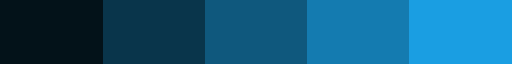

In [115]:
ListedColormap([to_hex(scale_lightness(to_rgb(pal_bgo_3[0]), _)) for _ in [0.1, 0.3, 0.5, 0.7, 0.9]])

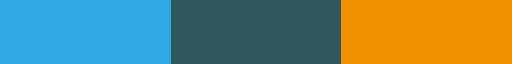

In [116]:
cmap_bgo_3

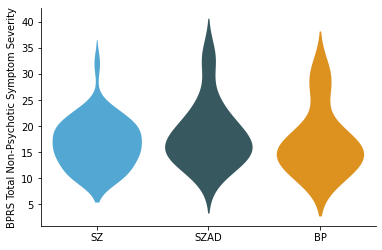

In [120]:
from matplotlib.colors import to_rgb, to_hex
import colorsys
import seaborn as sns
import matplotlib.pyplot as plt

# Original color palette
pal_bgo_3 = ["#31A9E7", "#305861", "#F19100"]

# Function to scale lightness of an RGB color
def scale_lightness(rgb, scale_l):
    h, l, s = colorsys.rgb_to_hls(*rgb)
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

# Create a list of brighter colors
bright_colors = [scale_lightness(to_rgb(color), 1.05) for color in pal_bgo_3]

# Convert to hex for seaborn compatibility
bright_colors_hex = [to_hex(color) for color in bright_colors]

# Create the plot
ax = sns.violinplot(
    data=MEND,  # Your data here
    x="Group", y="BPRS_nonpos", 
    palette=bright_colors_hex,
    inner=None,
    scale="area",
    linewidth=0
)

new_labels = ['SZ', 'SZAD', 'BP']  # Define your new labels here
ax.set_xticks(range(len(new_labels)))  # This sets the positions of the ticks
ax.set_xticklabels(new_labels) 
ax.set_xlabel('')
ax.set_ylabel('BPRS Total Non-Psychotic Symptom Severity')
# Remove right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
